<a href="https://colab.research.google.com/github/samkamau81/Laduma-Analytics-Football-League-Winners-Prediction-Challenge/blob/main/Laduma_Analytics1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laduma Analytics Football League Winners Prediction Challenge**

**By Samuel Waweru , B.Sc Mechatronic Engineering , JKUAT '25**

In [1]:
!pip install -U layer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 202 kB 5.3 MB/s 
     |████████████████████████████████| 3.5 MB 59.5 MB/s 
     |████████████████████████████████| 349 kB 67.8 MB/s 
     |████████████████████████████████| 106 kB 57.2 MB/s 
     |████████████████████████████████| 26.7 MB 1.7 MB/s 
     |████████████████████████████████| 4.1 MB 41.0 MB/s 
     |████████████████████████████████| 1.3 MB 47.7 MB/s 
     |████████████████████████████████| 235 kB 54.9 MB/s 
     |████████████████████████████████| 132 kB 41.7 MB/s 
     |████████████████████████████████| 2.4 MB 53.5 MB/s 
     |████████████████████████████████| 9.1 MB 38.4 MB/s 
     |████████████████████████████████| 79 kB 8.2 MB/s 
     |████████████████████████████████| 140 kB 71.0 MB/s 
     |████████████████████████████████| 181 kB 68.5 MB/s 
     |████████████████████████████████| 77 kB 6.0 MB/s 
     |██████████████████████████████

In [2]:
%matplotlib inline

from pathlib import Path
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
import seaborn as sns
import layer

In [3]:
sample_submission = layer.get_dataset("layer/Zindi-Laduma-Analytics/datasets/sample-submission").to_pandas()
sample_submission.head()

Successfully logged into https://app.layer.ai as guest


Output()

,Game_ID,Away win,Draw,Home Win
0,ID_8518U587,0,0,0
1,ID_H49BIKG7,0,0,0
2,ID_PO6SP4VA,0,0,0
3,ID_MZRCNBAQ,0,0,0
4,ID_CV9VOLIU,0,0,0


In [4]:
train = layer.get_dataset("layer/Zindi-Laduma-Analytics/datasets/train").to_pandas()
print(train.isnull().any())
train = train.dropna(how='any',axis=0)
train=train.reset_index()
train.drop(columns=['index'],axis=0)
train.head()

Output()

Date         False
Season       False
Match_ID     False
Game_ID      False
Home Team    False
Away Team    False
Score        False
dtype: bool


,index,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
0,0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win
1,1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw
2,2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win
3,3,2017-01-25,1,14.0,ID_TR5M4KQV,Andromeda,Cigar,Away win
4,4,2016-08-24,1,15.0,ID_EOIECRE2,Andromeda,Circinus,Home Win


In [5]:
### Label encoding categorical columns
le = LabelEncoder()
train['Date'] = le.fit_transform(train['Date'])
train['Game_ID'] = le.fit_transform(train['Game_ID'])
train['Home Team'] = le.fit_transform(train['Home Team'])
train['Away Team'] = le.fit_transform(train['Away Team'])
train['Score'] = le.fit_transform(train['Score'])
train.corr()

,index,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
index,1.000000,-0.141618,-0.174061,0.219380,-0.002397,0.403493,0.376177,0.026172
Date,-0.141618,1.000000,0.858992,0.416684,-0.073446,0.132460,0.133767,-0.038559
Season,-0.174061,0.858992,1.000000,0.055233,-0.075367,0.144010,0.163792,-0.038187
Match_ID,0.219380,0.416684,0.055233,1.000000,0.029576,0.245322,-0.025624,0.008559
Game_ID,-0.002397,-0.073446,-0.075367,0.029576,1.000000,-0.013697,-0.037263,-0.081638
Home Team,0.403493,0.132460,0.144010,0.245322,-0.013697,1.000000,-0.011960,0.061839
Away Team,0.376177,0.133767,0.163792,-0.025624,-0.037263,-0.011960,1.000000,0.038283
Score,0.026172,-0.038559,-0.038187,0.008559,-0.081638,0.061839,0.038283,1.000000


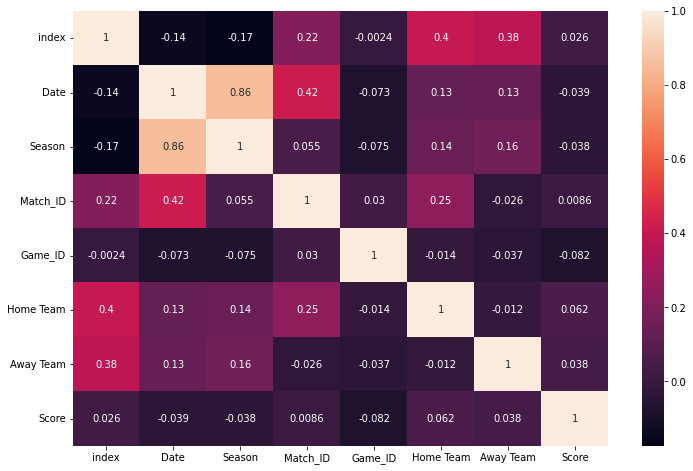

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True)
#fig size

In [7]:
train_game_statistics = layer.get_dataset("layer/Zindi-Laduma-Analytics/datasets/train_game_statistics").to_pandas()
print(train_game_statistics.isnull().any())
train_game_statistics = train_game_statistics.dropna(how='any',axis=1)
train_game_statistics=train_game_statistics.reset_index()
train_game_statistics.drop(columns=['index'],axis=0)
train_game_statistics.head()

Output()

Game_ID              False
Player_ID            False
id                   False
X                    False
Y                    False
Team                 False
Action               False
Half                 False
Season               False
Manager              False
Opposition_Team      False
Shots                False
SoT                  False
Goals_scored         False
Goals_conceded       False
Accurate passes      False
Inaccurate passes    False
Passes               False
Start_minutes        False
End_minutes          False
next_player           True
next_action           True
next_x                True
next_y                True
event_id              True
next_team             True
next_event_id         True
xt_value              True
dtype: bool


,index,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,...,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes
0,0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,...,Backward,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.03,0.37
1,1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,...,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.37
2,2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,...,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.38
3,3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,2,...,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.40
4,4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,2,...,Backward,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.07,0.40


In [8]:
### Label encoding categorical columns
le = LabelEncoder()
train_game_statistics['Game_ID'] = le.fit_transform(train_game_statistics['Game_ID'])
train_game_statistics['Player_ID'] = le.fit_transform(train_game_statistics['Player_ID'])
train_game_statistics['Half'] = le.fit_transform(train_game_statistics['Half'])
train_game_statistics['Manager'] = le.fit_transform(train_game_statistics['Manager'])
train_game_statistics['Opposition_Team'] = le.fit_transform(train_game_statistics['Opposition_Team'])
train_game_statistics.corr()

,index,Game_ID,Player_ID,id,X,Y,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes
index,1.000000,-0.999992,0.005315,0.007362,0.001561,0.004313,0.002600,0.077399,0.010315,0.024942,0.000160,-0.000912,-0.000155,-0.000155,0.000813,-0.000515,0.000501,0.003678,0.003678
Game_ID,-0.999992,1.000000,-0.005368,-0.004928,-0.001440,-0.004309,-0.000486,-0.077533,-0.010418,-0.025001,-0.000138,0.000922,0.000161,0.000161,-0.000904,0.000525,-0.000581,-0.001250,-0.001250
Player_ID,0.005315,-0.005368,1.000000,-0.009317,-0.047942,-0.055822,-0.009674,0.028792,-0.050935,0.010334,-0.004747,-0.003478,-0.001752,0.003249,0.011670,-0.005605,0.008061,-0.008442,-0.008442
id,0.007362,-0.004928,-0.009317,1.000000,0.045827,-0.005295,0.851209,-0.042655,-0.004257,-0.013220,0.009010,0.004964,0.002620,0.002620,-0.029214,0.000792,-0.026665,0.977349,0.977349
X,0.001561,-0.001440,-0.047942,0.045827,1.000000,0.004872,0.035623,-0.002271,-0.001523,-0.005739,0.098519,0.052854,0.035217,-0.035332,-0.070841,0.018822,-0.056378,0.046558,0.046566
Y,0.004313,-0.004309,-0.055822,-0.005295,0.004872,1.000000,-0.006972,-0.000380,0.001676,0.000330,0.000893,0.000314,0.000153,0.000433,0.002930,-0.001447,0.002004,-0.005900,-0.005899
Half,0.002600,-0.000486,-0.009674,0.851209,0.035623,-0.006972,1.000000,0.000061,0.004875,-0.001506,0.006213,0.002965,0.001911,0.001911,-0.024929,0.004352,-0.020953,0.866199,0.866195
Season,0.077399,-0.077533,0.028792,-0.042655,-0.002271,-0.000380,0.000061,1.000000,0.066990,0.150186,-0.002762,-0.001440,0.000727,0.000727,0.019199,0.004019,0.019747,-0.003901,-0.003899
Manager,0.010315,-0.010418,-0.050935,-0.004257,-0.001523,0.001676,0.004875,0.066990,1.000000,-0.017070,0.001368,0.001344,-0.000327,0.001270,-0.003220,0.000660,-0.002658,0.000526,0.000526
Opposition_Team,0.024942,-0.025001,0.010334,-0.013220,-0.005739,0.000330,-0.001506,0.150186,-0.017070,1.000000,0.000855,0.000537,-0.000184,0.000346,0.002084,-0.000058,0.001901,-0.007631,-0.007631


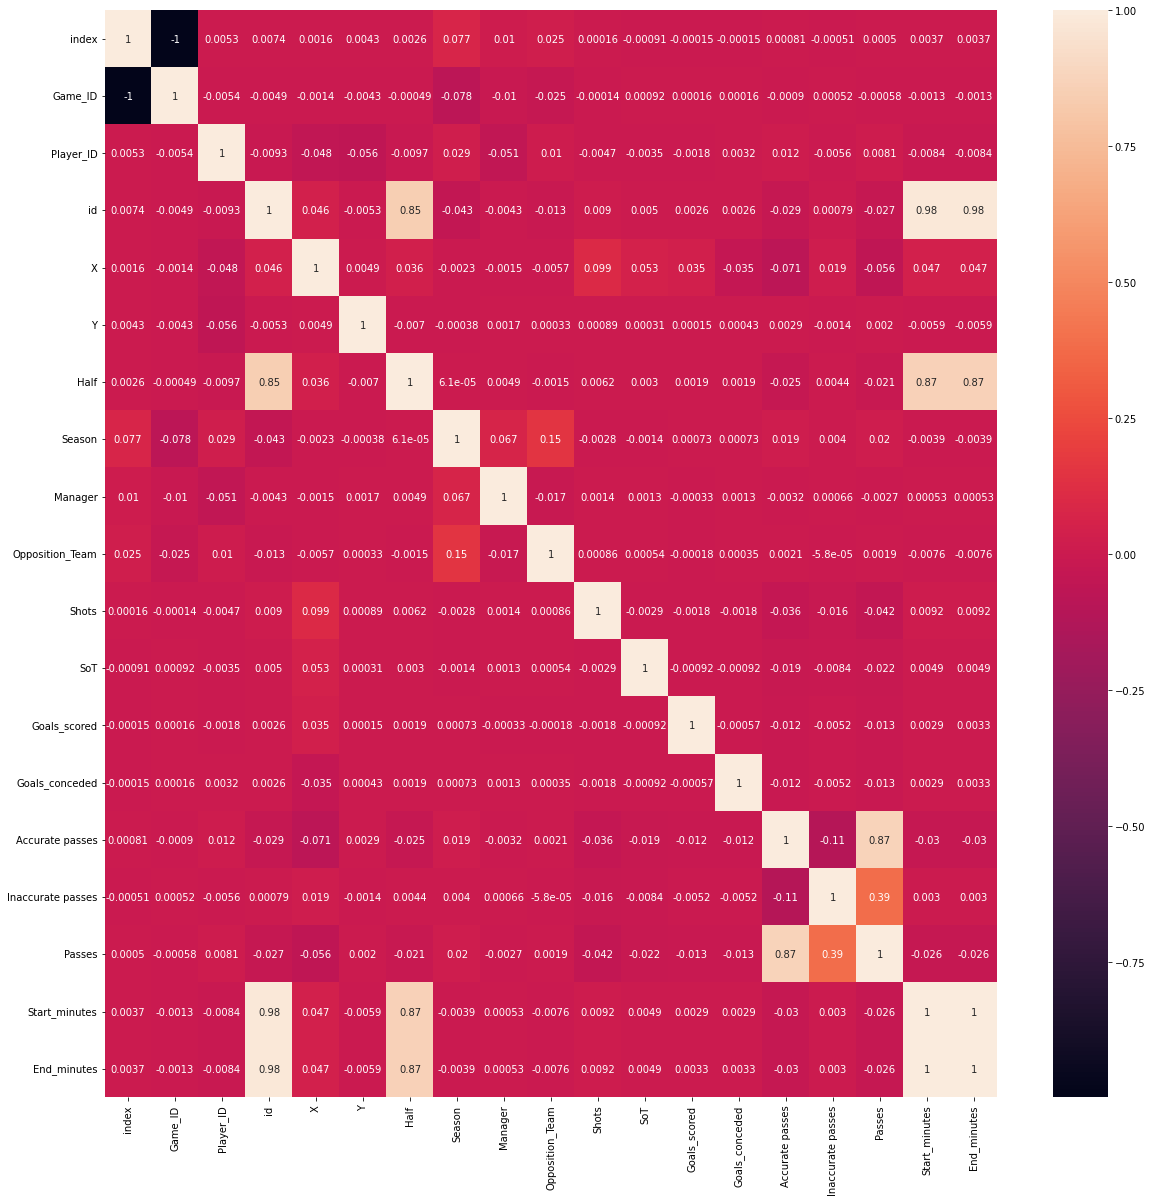

In [9]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_game_statistics.corr(), annot=True)
#fig size

In [10]:
test = layer.get_dataset("layer/Zindi-Laduma-Analytics/datasets/test").to_pandas()
print(test.isnull().any())
test = test.dropna(how='any',axis=0)
test=test.reset_index()
test.drop(columns=['index'],axis=0)
test.head()

Output()

Date         False
Season       False
Match_ID     False
Game_ID      False
Home Team    False
Away Team    False
dtype: bool


,index,Date,Season,Match_ID,Game_ID,Home Team,Away Team
0,0,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7
1,1,2018-09-11,3,18.0,ID_H49BIKG7,Cosmos Redshift 7,Tadpole
2,2,2018-09-25,3,32.0,ID_PO6SP4VA,Cosmos Redshift 7,Medusa Merger
3,3,2018-10-02,3,40.0,ID_MZRCNBAQ,Cartwheel,Cosmos Redshift 7
4,4,2018-12-20,3,123.0,ID_CV9VOLIU,Cosmos Redshift 7,Needle


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      234 non-null    int64  
 1   Date       234 non-null    object 
 2   Season     234 non-null    int64  
 3   Match_ID   234 non-null    float64
 4   Game_ID    234 non-null    object 
 5   Home Team  234 non-null    object 
 6   Away Team  234 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 12.9+ KB


In [12]:
### Label encoding categorical columns
le = LabelEncoder()
test['Date'] = le.fit_transform(test['Date'])
test['Home Team'] = le.fit_transform(test['Home Team'])
test['Away Team'] = le.fit_transform(test['Away Team'])
test.corr()

,index,Date,Season,Match_ID,Home Team,Away Team
index,1.000000,0.133013,NaN,0.274307,0.288964,0.287807
Date,0.133013,1.000000,NaN,0.783816,-0.025533,-0.002058
Season,NaN,NaN,NaN,NaN,NaN,NaN
Match_ID,0.274307,0.783816,NaN,1.000000,-0.033461,0.033204
Home Team,0.288964,-0.025533,NaN,-0.033461,1.000000,-0.070952
Away Team,0.287807,-0.002058,NaN,0.033204,-0.070952,1.000000


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      234 non-null    int64  
 1   Date       234 non-null    int64  
 2   Season     234 non-null    int64  
 3   Match_ID   234 non-null    float64
 4   Game_ID    234 non-null    object 
 5   Home Team  234 non-null    int64  
 6   Away Team  234 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 12.9+ KB


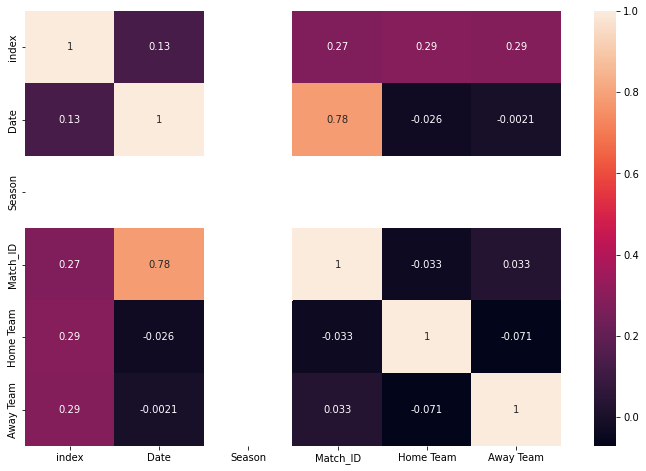

In [14]:
plt.figure(figsize = (12,8))
sns.heatmap(test.corr(),annot=True)
#fig size

In [15]:
test_game_statistics = layer.get_dataset("layer/Zindi-Laduma-Analytics/datasets/test_game_statistics").to_pandas()
print(test_game_statistics.isnull().any())
test_game_statistics = test_game_statistics.dropna(how='any',axis=0)
test_game_statistics=test_game_statistics.reset_index()
test_game_statistics.drop(columns=['index'],axis=0)
test_game_statistics.head()

Output()

Game_ID              False
Player_ID            False
id                   False
X                    False
Y                    False
Team                 False
Half                  True
Season               False
Manager               True
Opposition_Team      False
Shots                 True
SoT                   True
Accurate passes       True
Inaccurate passes     True
Passes                True
Start_minutes         True
End_minutes          False
next_player           True
next_x                True
next_y                True
event_id             False
next_team             True
next_event_id         True
xt_value             False
dtype: bool


,index,Game_ID,Player_ID,id,X,Y,Team,Half,Season,Manager,...,Passes,Start_minutes,End_minutes,next_player,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,0,ID_ZUPS2JD2,Player_5CBBVY85,1.0,52.5,34.0,Milky Way,1st half,3,Masashi,...,1.0,0.68,1.02,Player_INTSA2WQ,37.5,30.9,0.0,Milky Way,1.0,-0.002220
1,1,ID_ZUPS2JD2,Player_5CBBVY85,2.0,52.5,34.0,Milky Way,1st half,3,Masashi,...,0.0,0.68,1.02,Player_5CBBVY85,52.5,34.0,0.0,Milky Way,0.0,0.000000
2,2,ID_ZUPS2JD2,Player_INTSA2WQ,3.0,37.5,30.9,Milky Way,1st half,3,Masashi,...,0.0,0.70,1.03,Player_INTSA2WQ,37.5,30.9,1.0,Milky Way,1.0,0.000000
3,3,ID_ZUPS2JD2,Player_INTSA2WQ,4.0,37.5,30.9,Milky Way,1st half,3,Masashi,...,1.0,0.70,1.03,Player_1AJ0QRLU,79.0,57.2,1.0,Sunflower,2.0,0.016906
4,4,ID_ZUPS2JD2,Player_1AJ0QRLU,5.0,26.0,10.8,Sunflower,1st half,3,Frodo,...,0.0,0.77,1.10,Player_75QJWOU4,79.0,57.2,2.0,Milky Way,3.0,0.000000


In [16]:
### Label encoding categorical columns
le = LabelEncoder()
test_game_statistics['Game_ID'] = le.fit_transform(test_game_statistics['Game_ID'])
test_game_statistics['Player_ID'] = le.fit_transform(test_game_statistics['Player_ID'])
test_game_statistics['Half'] = le.fit_transform(test_game_statistics['Half'])
test_game_statistics['Manager']= le.fit_transform(test_game_statistics['Manager'])
test_game_statistics['Opposition_Team']= le.fit_transform(test_game_statistics['Opposition_Team'])
test_game_statistics['next_player']= le.fit_transform(test_game_statistics['next_player'])
test_game_statistics['next_team']= le.fit_transform(test_game_statistics['next_team'])
test_game_statistics.corr()

,index,Game_ID,Player_ID,id,X,Y,Half,Season,Manager,Opposition_Team,...,Passes,Start_minutes,End_minutes,next_player,next_x,next_y,event_id,next_team,next_event_id,xt_value
index,1.000000,-0.999973,0.021811,0.001235,0.002373,0.001035,0.008377,NaN,0.013096,-0.078357,...,-0.001250,0.013197,0.013198,0.021247,0.002246,0.001114,-0.000093,-0.096147,-0.000093,0.001979
Game_ID,-0.999973,1.000000,-0.021936,0.003425,-0.002154,-0.001086,-0.004342,NaN,-0.013551,0.077874,...,0.001105,-0.008509,-0.008510,-0.021373,-0.002003,-0.001167,0.004714,0.095676,0.004714,-0.001908
Player_ID,0.021811,-0.021936,1.000000,-0.002659,-0.055227,-0.066288,-0.004029,NaN,0.011644,0.009081,...,0.009865,-0.006139,-0.006140,0.585038,-0.038954,-0.044179,-0.002269,-0.035913,-0.002265,-0.009065
id,0.001235,0.003425,-0.002659,1.000000,0.048543,-0.012671,0.853235,NaN,0.011112,-0.015813,...,-0.027746,0.981561,0.981560,-0.003249,0.052297,-0.013002,0.997894,-0.012427,0.997892,0.011630
X,0.002373,-0.002154,-0.055227,0.048543,1.000000,-0.000719,0.037636,NaN,-0.019917,0.001535,...,-0.054838,0.049850,0.049859,-0.029100,0.551499,-0.002524,0.048004,0.002180,0.047960,0.062517
Y,0.001035,-0.001086,-0.066288,-0.012671,-0.000719,1.000000,-0.011313,NaN,0.000038,0.005751,...,0.003167,-0.013097,-0.013096,-0.039476,-0.005667,0.628602,-0.012782,-0.011662,-0.012784,-0.006233
Half,0.008377,-0.004342,-0.004029,0.853235,0.037636,-0.011313,1.000000,NaN,0.004667,-0.002364,...,-0.023244,0.866869,0.866866,-0.004627,0.041489,-0.011754,0.847886,0.007943,0.847886,0.010913
Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Manager,0.013096,-0.013551,0.011644,0.011112,-0.019917,0.000038,0.004667,NaN,1.000000,-0.017389,...,-0.004559,-0.000997,-0.000997,0.009092,-0.010123,-0.001541,0.012059,0.072180,0.012059,-0.001921
Opposition_Team,-0.078357,0.077874,0.009081,-0.015813,0.001535,0.005751,-0.002364,NaN,-0.017389,1.000000,...,0.000185,0.002286,0.002286,-0.001987,0.002506,0.005570,-0.015216,0.181856,-0.015215,0.000658


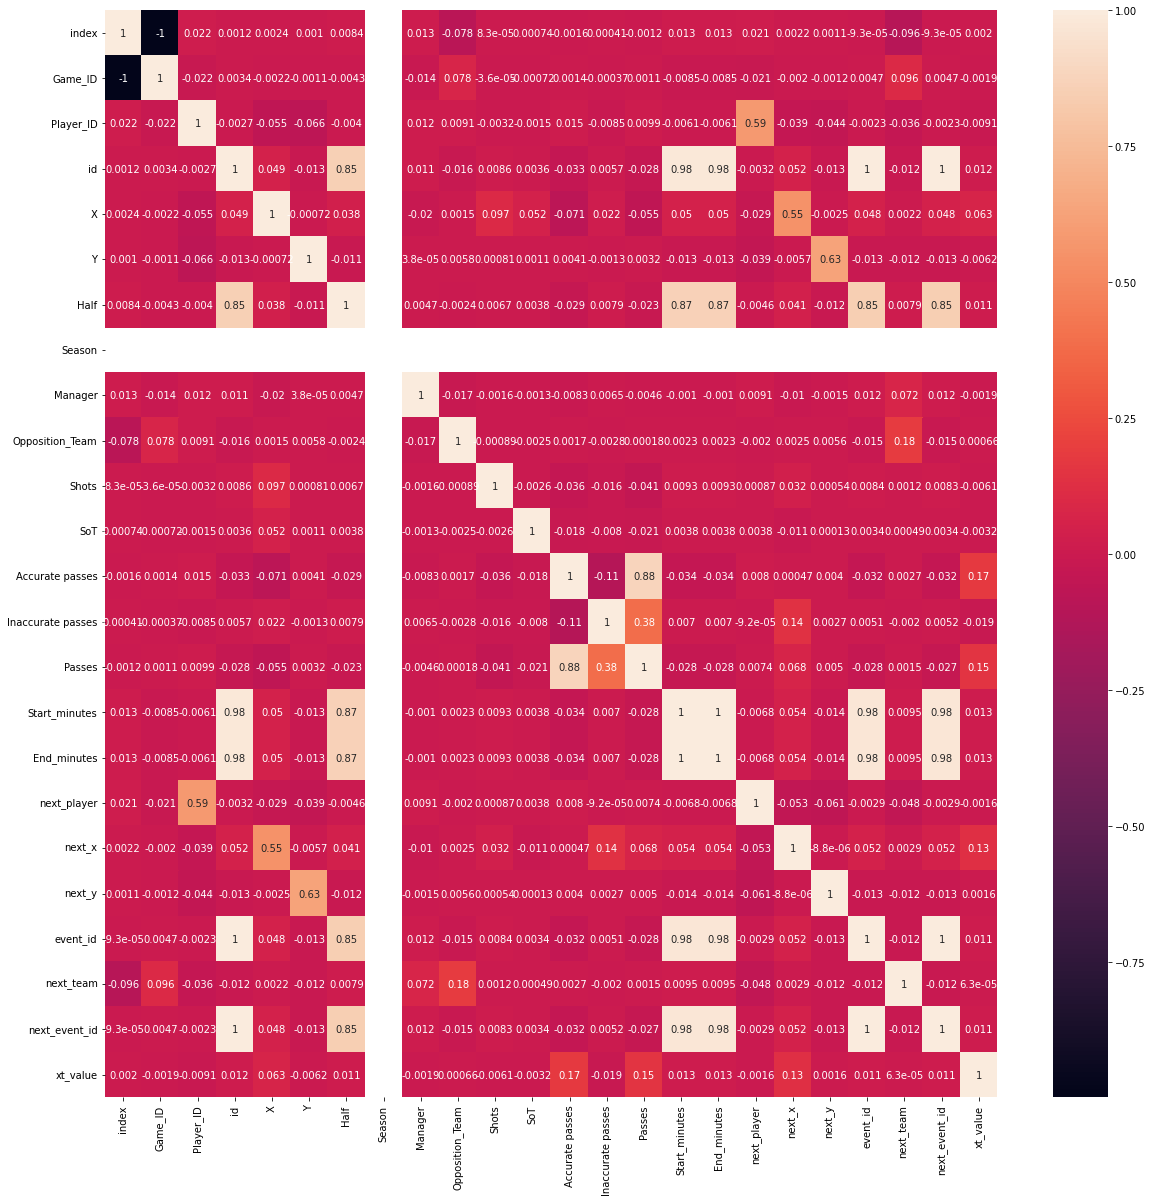

In [17]:

plt.figure(figsize=(20,20))
sns.heatmap(test_game_statistics.corr(), annot=True)
#fig size

## Selecting the features that have good correlation with the target variable

In [18]:
trainData, validData = train_test_split(train, test_size=0.4, random_state=26)
print(trainData.shape, validData.shape)

(247, 8) (165, 8)


In [19]:
train_X=trainData[['Home Team','Away Team']]
print(train_X)
train_y=trainData[['Score']]
print(train_y)

     Home Team  Away Team
162          9          3
388         13         12
35           8          0
397         12         10
116         10          2
..         ...        ...
211          5          9
102         18          8
262          4         18
318         18         12
309          6          5

[247 rows x 2 columns]
     Score
162      1
388      0
35       2
397      2
116      0
..     ...
211      2
102      2
262      2
318      0
309      0

[247 rows x 1 columns]


## **TRAIN MODELS**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [35]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(train_X,train_y)
logistic_reg = LogisticRegression(random_state=0)
logistic_reg.fit(train_X, train_y)
gnb = GaussianNB()
gnb.fit(train_X, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [22]:
test_X=validData[['Home Team','Away Team']]
print(test_X)
test_y=validData[['Score']]
print(test_y)

     Home Team  Away Team
345          7         13
93           7         18
330          6          8
214          9          5
334         14          6
..         ...        ...
272         11         12
90          17          1
120          2          4
239         12          4
25           0          4

[165 rows x 2 columns]
     Score
345      0
93       1
330      2
214      2
334      1
..     ...
272      0
90       1
120      1
239      2
25       1

[165 rows x 1 columns]


## **Testing the Models**


In [23]:
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

In [24]:
test_Xpred=knn_clf.predict(test_X)
print(test_Xpred)
test_y=np.array(test_y).flatten()
#score=log_loss(test_y,test_Xpred)
result = confusion_matrix(test_y, test_Xpred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_y, test_Xpred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(test_y,test_Xpred)
print("Accuracy:",result2)
score = knn_clf.score(test_X, test_y)
print(score)


[0 1 2 1 2 2 1 0 2 2 2 0 0 0 1 1 2 2 2 2 1 0 0 0 0 2 2 2 2 0 0 0 2 1 1 2 0
 1 1 1 1 0 1 1 1 0 1 2 0 1 1 2 1 2 0 1 2 1 0 0 0 0 2 0 2 1 2 1 0 2 2 1 2 2
 1 0 1 0 0 0 1 2 0 1 2 0 1 0 0 0 1 2 1 2 0 2 1 1 1 1 0 1 1 2 1 1 1 0 1 1 1
 0 0 1 0 0 0 1 1 1 1 2 1 0 1 1 0 1 1 0 0 2 1 0 1 2 1 0 0 1 2 1 2 0 0 1 0 2
 1 1 0 0 0 1 2 0 1 1 1 0 0 2 1 0 0]
Confusion Matrix:
[[21 18 11]
 [15 19 13]
 [22 29 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.42      0.39        50
           1       0.29      0.40      0.34        47
           2       0.41      0.25      0.31        68

    accuracy                           0.35       165
   macro avg       0.35      0.36      0.35       165
weighted avg       0.36      0.35      0.34       165

Accuracy: 0.34545454545454546
0.34545454545454546


In [25]:
test.head()

,index,Date,Season,Match_ID,Game_ID,Home Team,Away Team
0,0,39,3,102.0,ID_8518U587,1,7
1,1,4,3,18.0,ID_H49BIKG7,7,14
2,2,11,3,32.0,ID_PO6SP4VA,7,10
3,3,13,3,40.0,ID_MZRCNBAQ,3,7
4,4,46,3,123.0,ID_CV9VOLIU,7,12


In [26]:
my_submission=test[['Game_ID','Home Team','Away Team']]
my_submission['Score']=knn_clf.predict(test[['Home Team','Away Team']])
print(my_submission.head())

       Game_ID  Home Team  Away Team  Score
0  ID_8518U587          1          7      2
1  ID_H49BIKG7          7         14      1
2  ID_PO6SP4VA          7         10      1
3  ID_MZRCNBAQ          3          7      0
4  ID_CV9VOLIU          7         12      1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
my_submission.to_csv (r'my_submission.csv', index = False, header=True)

In [28]:
test_Xpred=logistic_reg.predict(test_X)
print(test_Xpred)
test_y=np.array(test_y).flatten()
#score=log_loss(test_y,test_Xpred)
result = confusion_matrix(test_y, test_Xpred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_y, test_Xpred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(test_y,test_Xpred)
print("Accuracy:",result2)
score = logistic_reg.score(test_X, test_y)
print(score)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Confusion Matrix:
[[ 0  0 50]
 [ 0  0 47]
 [ 0  0 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        47
           2       0.41      1.00      0.58        68

    accuracy                           0.41       165
   macro avg       0.14      0.33      0.19       165
weighted avg       0.17      0.41      0.24       165

Accuracy: 0.4121212121212121
0.4121212121212121


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
test_Xpred=gnb.predict(test_X)
print(test_Xpred)
test_y=np.array(test_y).flatten()
#score=log_loss(test_y,test_Xpred)
result = confusion_matrix(test_y, test_Xpred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_y, test_Xpred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(test_y,test_Xpred)
print("Accuracy:",result2)
score = gnb.score(test_X, test_y)
print(score)

[2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Confusion Matrix:
[[ 0  3 47]
 [ 0 11 36]
 [ 0  2 66]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.69      0.23      0.35        47
           2       0.44      0.97      0.61        68

    accuracy                           0.47       165
   macro avg       0.38      0.40      0.32       165
weighted avg       0.38      0.47      0.35       165

Accuracy: 0.4666666666666667
0.4666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(train_X, train_y)
test_Xpred=clf.predict(test_X)
print(test_Xpred)
test_y=np.array(test_y).flatten()
#score=log_loss(test_y,test_Xpred)
result = confusion_matrix(test_y, test_Xpred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_y, test_Xpred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(test_y,test_Xpred)
print("Accuracy:",result2)
score = clf.score(test_X, test_y)
print(score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[1 1 2 2 2 1 2 1 2 2 2 0 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 0 0 2 2 2 2 2
 1 2 2 2 1 2 2 1 1 1 2 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 1 2 0 1 1 2 1 2 1 1 0 2 1 1 0 2 1 2 2 2 2 2 1 1 2 0 2 1 2 1 2 1 2 2 1 1
 1 2 1 1 1 0 2 1 1 1 2 2 2 1 1 2 2 2 1 0 2 2 2 2 2 2 1 1 2 2 1 2 1 2 1 2 2
 2 2 1 2 2 2 2 2 1 2 2 2 1 2 2 2 0]
Confusion Matrix:
[[ 4 22 24]
 [ 6 12 29]
 [ 1 16 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.08      0.13        50
           1       0.24      0.26      0.25        47
           2       0.49      0.75      0.59        68

    accuracy                           0.41       165
   macro avg       0.36      0.36      0.32       165
weighted avg       0.38      0.41      0.35       165

Accuracy: 0.40606060606060607
0.40606060606060607


In [33]:
my_submission=test[['Game_ID','Home Team','Away Team']]
my_submission['Score']=clf.predict(test[['Home Team','Away Team']])
print(my_submission.head())

       Game_ID  Home Team  Away Team  Score
0  ID_8518U587          1          7      2
1  ID_H49BIKG7          7         14      2
2  ID_PO6SP4VA          7         10      2
3  ID_MZRCNBAQ          3          7      2
4  ID_CV9VOLIU          7         12      1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
